In [1]:
import pandas as pd
import matplotlib .pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.isnull().values.any()

False

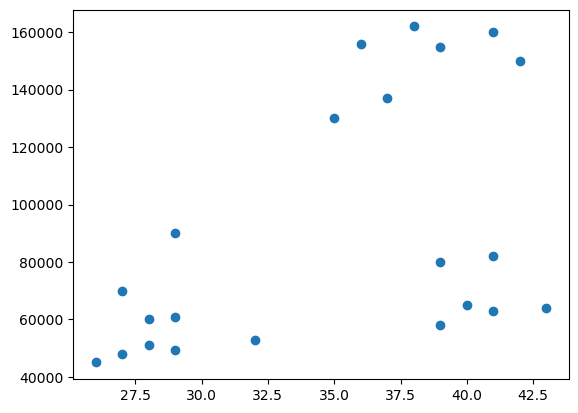

In [4]:
plt.scatter(df['Age'], df['Income($)'])

In [5]:
km = KMeans(n_clusters = 3, n_init = 'auto')
km

KMeans(n_clusters=3, n_init='auto')

In [6]:
clusters = km.fit_predict(df[['Age', 'Income($)']])
clusters

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = clusters

In [8]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

Text(0, 0.5, 'Income($)')

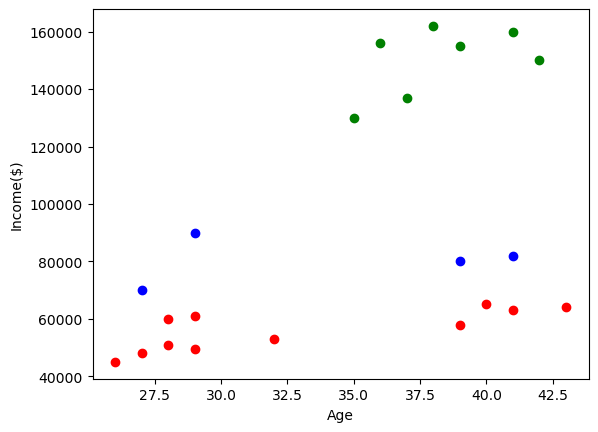

In [10]:
plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [11]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [12]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
KMeans_model = KMeans(n_clusters = 3, n_init = 'auto')

In [14]:
new_clusters = KMeans_model.fit_predict(df[['Age', 'Income($)']])
new_clusters

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
df['cluster'] = new_clusters

In [16]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

In [17]:
centroids = KMeans_model.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income($)')

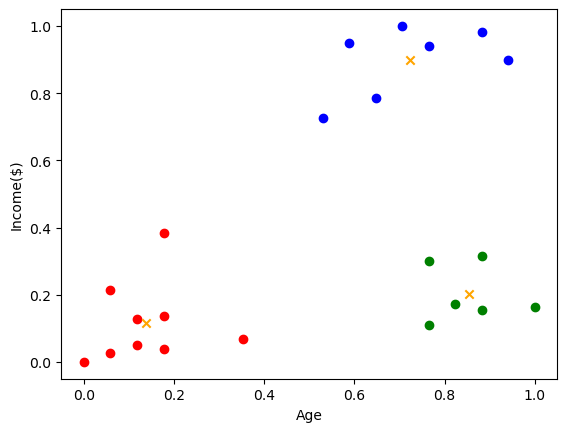

In [18]:
plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue')
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', color = 'orange')
plt.xlabel('Age')
plt.ylabel('Income($)')

## Predicting the best value of k

In [22]:
k_range = range(1, 11)
sse = []

for k in k_range:
    model = KMeans(n_clusters = k, n_init = 'auto')
    model.fit(df[['Age', 'Income($)']])
    sse.append(model.inertia_)

In [23]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.34910470944195654,
 0.29009690826780427,
 0.22443334487241423,
 0.20581725603185552,
 0.16460472054991912,
 0.10824862283029266,
 0.09420954368348863]

Text(0, 0.5, 'sse')

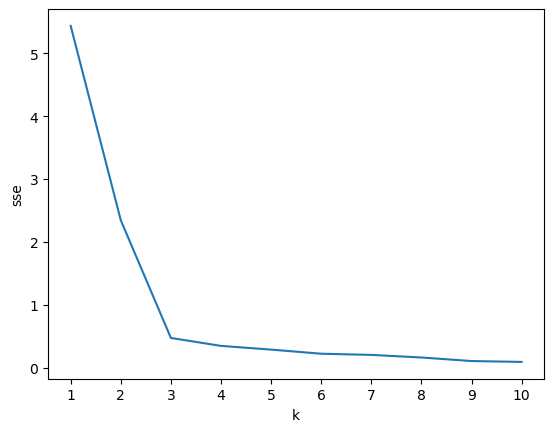

In [32]:
%matplotlib inline
plt.plot([1,2,3,4,5,6,7,8,9,10], sse)
plt.xticks(k_range)
plt.xlabel('k')
plt.ylabel('sse')